In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd

## Loading and Mapping

In [3]:
#Loading the Dataframe
Dataset = pd.read_pickle("Data_te_std.pkl")
Dataset_norm = pd.read_pickle("Data_te_norm.pkl") 
Attack_label = pd.read_pickle("Attack_label.pkl")
Attack_type = pd.read_pickle("Attack_type.pkl")

# Working with smaller Dataset first
from sklearn.utils.random import sample_without_replacement
indices = sample_without_replacement(Dataset.shape[0],Dataset.shape[0]/5 , random_state=22)
Dataset_short = pd.DataFrame(Dataset.loc[indices.tolist()])
Attack_label_short = pd.DataFrame(Attack_label.loc[indices.tolist()])


# Checking distribution before and after shortening
print("Reduced Dataset Shape: ", Dataset_short.shape)

Reduced Dataset Shape:  (31560, 36)


In [4]:
# mapping and then sampling
mapping_dict = {'DDoS_UDP': 1, 'DDoS_ICMP': 1, 'DDoS_HTTP': 1, 'DDoS_TCP': 1,
                'Port_Scanning': 2, 'Fingerprinting': 2, 'Vulnerability_scanner': 2,
                'MITM' : 3, 'XSS' : 4, 'SQL_injection': 4, 'Uploading':4, 
                'Backdoor': 5, 'Password': 5, 'Ransomware':5, 'Normal':6}
temp = Attack_type.map(mapping_dict)
Attack_type_short = pd.DataFrame(temp.loc[indices.tolist()])

print("Before mapping", Attack_type.value_counts(normalize=True))
print("After mapping", Attack_type_short.value_counts(normalize=True))

Before mapping Attack_type
Normal                   0.153999
DDoS_UDP                 0.091876
DDoS_ICMP                0.089290
Ransomware               0.069233
DDoS_HTTP                0.066926
SQL_injection            0.065342
Uploading                0.065076
DDoS_TCP                 0.064937
Backdoor                 0.064607
Vulnerability_scanner    0.063853
Port_Scanning            0.063821
XSS                      0.063701
Password                 0.063302
MITM                     0.007693
Fingerprinting           0.006343
Name: proportion, dtype: float64
After mapping Attack_type
1              0.312579
5              0.197782
4              0.196198
6              0.153200
2              0.133080
3              0.007161
Name: proportion, dtype: float64


## Sampling

In [5]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state= 22)
Dataset_res, Target_res = sm.fit_resample(Dataset_short, Attack_type_short)
print("Target Shape: ", Attack_type_short.shape)
print("Resampled Target Shape: ", Target_res.shape)

Target Shape:  (31560, 1)
Resampled Target Shape:  (30966, 1)


In [6]:
print(Attack_type_short.value_counts(normalize = True))
print(Target_res.value_counts(normalize = True))

Attack_type
1              0.312579
5              0.197782
4              0.196198
6              0.153200
2              0.133080
3              0.007161
Name: proportion, dtype: float64
Attack_type
1              0.218885
2              0.214590
5              0.190564
6              0.172318
3              0.108700
4              0.094943
Name: proportion, dtype: float64


1 = DDoS attacks<br>
2 = Scanning attacks<br>
3 = MITM attacks<br>
4 = Injection attacks<br> 
5 = Malware attacks<br>
6 = Normal<br>

## Train-Test split

In [7]:
X = Dataset_res.to_numpy() 
Y = Target_res.to_numpy(dtype='int')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=22) 

## Linear SVC

### Determining Hyperparameter

In [12]:
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC

C_param = [1, 10, 15, 20]
clf = LinearSVC()
train_score, test_score = validation_curve(clf, X_train, Y_train, param_name= 'C', param_range= C_param, cv=2)

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y wa

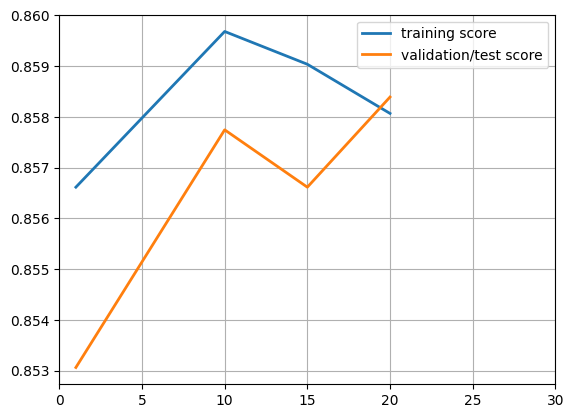

In [14]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(C_param, train_score.mean(axis=1), linewidth=2.0, label = 'training score')
ax.plot(C_param, test_score.mean(axis=1), linewidth=2.0, label = 'validation/test score')
ax.set(xlim=(0, 30))
plt.legend()
plt.show()

* There is no significance improvement on increasing the Parameter 'C'. Hence let the Parameter be default value which is 1.

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3

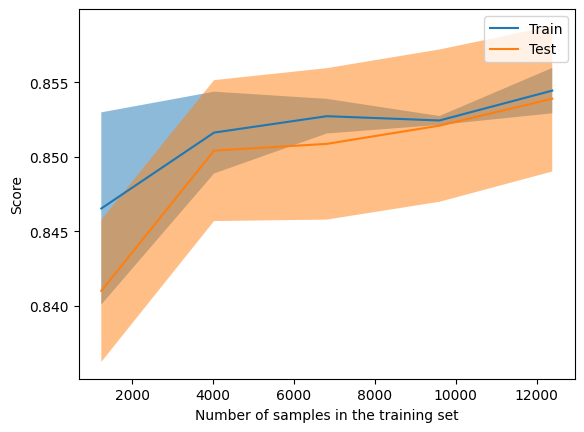

In [15]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=22)
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, Y_train)
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

* No significant Improvement on increasing the number of samples aftter 4000.

### The Modal

In [40]:
from sklearn.svm import LinearSVC # one vs Rest/ one vs all
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22) 
lin_svc = LinearSVC()
mult_clf = lin_svc.fit(X_train, Y_train)
Y_pred = mult_clf.predict(X_test)

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


/home/user/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


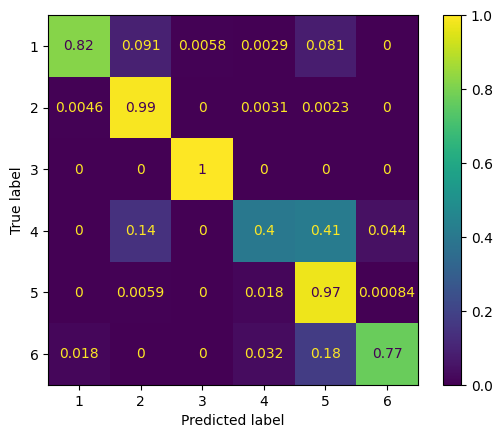

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred, labels=mult_clf.classes_, normalize= 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= mult_clf.classes_)
disp.plot()
plt.show()

In [42]:
print("Average Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) # Model Accuracy
df_metric = pd.DataFrame({'Precision':metrics.precision_score(Y_test, Y_pred, average=None),
                        'Recall': metrics.recall_score(Y_test, Y_pred, average=None),
                        'F1-Score': metrics.f1_score(Y_test, Y_pred, average=None)}, index= mult_clf.classes_)
print(df_metric)

Average Accuracy: 0.8571197933484017
   Precision    Recall  F1-Score
1   0.978522  0.819424  0.891934
2   0.856196  0.990038  0.918266
3   0.988372  1.000000  0.994152
4   0.790698  0.400673  0.531844
5   0.680913  0.974853  0.801792
6   0.967233  0.772287  0.858836


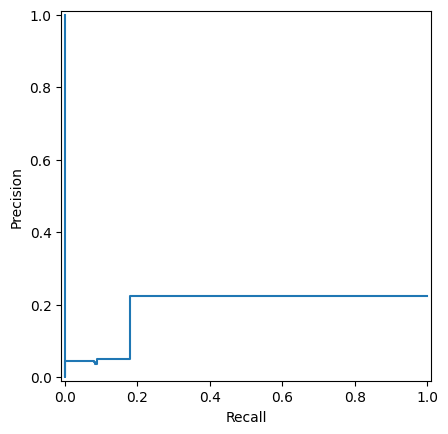

In [64]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(Y_test, Y_pred, pos_label=mult_clf.classes_[0])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## SVC

### Determining Hyperparameter

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

C_param = [1, 100, 1000, 10000, 1e5]
svc = SVC(kernel='rbf', decision_function_shape= 'ovo')
train_score, test_score = validation_curve(svc, X_train, Y_train, param_name= 'C', param_range= C_param, cv=2)

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

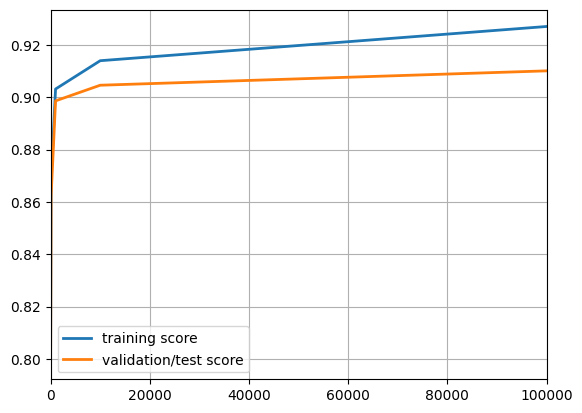

In [14]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(C_param, train_score.mean(axis=1), linewidth=2.0, label = 'training score')
ax.plot(C_param, test_score.mean(axis=1), linewidth=2.0, label = 'validation/test score')
ax.set(xlim=(0, 1e5))
plt.legend()
plt.show()

* The parameter C of value 1e4 is enough for the modal to give optimum result

### The Modal 

In [30]:
from sklearn.svm import SVC # one vs one
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22) 
svc = SVC(kernel ='rbf', C= 1e4, decision_function_shape= 'ovo')
mult_clf = svc.fit(X_train, Y_train)
Y_pred = mult_clf.predict(X_test)

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


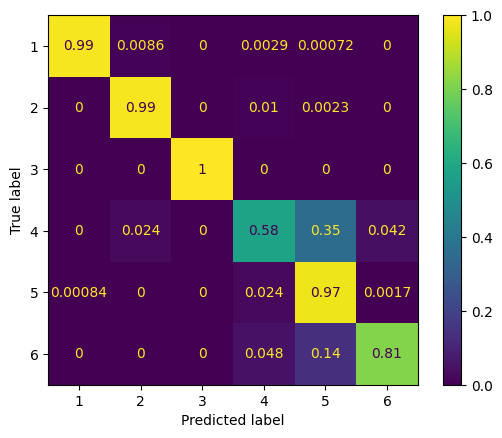

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred, labels=mult_clf.classes_, normalize= 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mult_clf.classes_)
disp.plot()
plt.show()

In [33]:
print("Average Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) # Model Accuracy
df_metric = pd.DataFrame({'Precision':metrics.precision_score(Y_test, Y_pred, average=None),
                        'Recall': metrics.recall_score(Y_test, Y_pred, average=None),
                        'F1-Score': metrics.f1_score(Y_test, Y_pred, average=None)}, index= mult_clf.classes_)
print(df_metric)

Average Accuracy: 0.9183080400387472
   Precision    Recall  F1-Score
1   0.999272  0.987770  0.993488
2   0.980228  0.987739  0.983969
3   1.000000  1.000000  1.000000
4   0.782313  0.580808  0.666667
5   0.765326  0.973177  0.856827
6   0.968858  0.813953  0.884676


### The Modal after PCA

In [34]:
from sklearn.svm import SVC # one vs one

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_PCA = pca.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, Y, test_size=0.2, random_state=22) 

svc = SVC(kernel ='rbf', C= 1e4, decision_function_shape= 'ovo')
mult_clf = svc.fit(X_train, Y_train)
Y_pred = mult_clf.predict(X_test)

/home/user/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


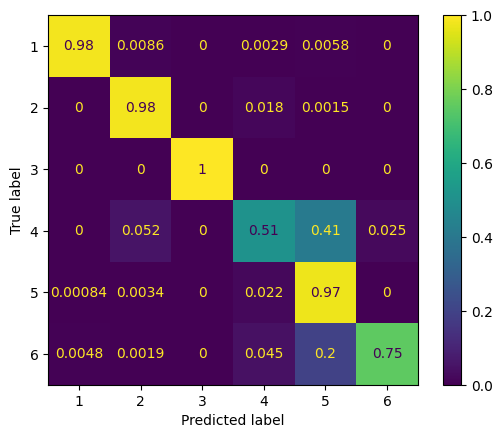

In [35]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred, labels=mult_clf.classes_, normalize= 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mult_clf.classes_)
disp.plot()
plt.show()

In [38]:
print("Average Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) # Model Accuracy
df_metric = pd.DataFrame({'Precision':metrics.precision_score(Y_test, Y_pred, average=None),
                        'Recall': metrics.recall_score(Y_test, Y_pred, average=None),
                        'F1-Score': metrics.f1_score(Y_test, Y_pred, average=None)}, index= mult_clf.classes_)
print(df_metric)

Average Accuracy: 0.898611559573781
   Precision    Recall  F1-Score
1   0.995627  0.982734  0.989138
2   0.963130  0.980843  0.971906
3   1.000000  1.000000  1.000000
4   0.753731  0.510101  0.608434
5   0.716841  0.974015  0.825871
6   0.981013  0.750969  0.850714


## Conclusion

The Multiclass classification is performed by LinearSVC and SVC model. The **Linear-SVC uses OnevsRest** method to classify the samples. Whereas the **SVC uses OnevsOne**. The Hyperparameter for each Algorithm is evaluated and trained with sampled Datapoints (SMOTEENN). The results are compared from with and wthout PCA application.<br>

The Results shows that the SVC have a better Result than Linear SVC. But Both of the method perform least by the classification of Injection attacks.<br>
To note is that the 41% of the misclassified Injection Attacks (class = 4) is classified as Malware Attacks (class = 5) and almost negligible percentage as normal sample (class = 6). <br>
The dimension Reduction by SVC worked considerably well. Halved its Training time and produced almost the same result.
